<a href="https://colab.research.google.com/github/Marcelo-Mathias77/MVP_Analise_de_dados_e_boas_praticas/blob/main/An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_(40530010055_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Marcelo Chagas Mathias Netto

**Matrícula:** 4052025000162

**Dataset:** [AI4I 2020 Predictive Maintenance Dataset](https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset)

# 1. Definição do Problema

## 1.1. Descrição do Problema

O dataset AI4I 2020 Predictive Maintenance é um conjunto de dados multivariado voltado para a análise e previsão de falhas em máquinas industriais. Ele contém 10.000 registros, cada um representando uma leitura de sensores em uma máquina durante sua operação, e inclui tanto variáveis numéricas contínuas (como temperatura, torque, velocidade de rotação e desgaste da ferramenta) quanto variáveis categóricas (como o tipo de produto fabricado).

## 1.2. Objetivo da Análise

O objetivo principal da análise de dados nesse conjunto é identificar padrões que indiquem a ocorrência de falhas de máquina, representadas por uma variável binária chamada machine_failure. Através de técnicas de análise exploratória e pré-processamento, busca-se compreender como os diferentes atributos influenciam o comportamento da máquina, contribuindo assim para possíveis estratégias de manutenção preditiva mais eficientes.

## 1.3. Hipóteses do Problema

As hipóteses que serão objeto desse estudo são as seguintes:

a) Máquinas com maior desgaste da ferramenta apresentam maior probabilidade de falha?
→ Espera-se que o desgaste acumulado ao longo do tempo seja um forte indicador de falha iminente.

b) A combinação de alta temperatura do processo e alto torque está associada a um aumento nas falhas da máquina?
→ Uma carga mecânica excessiva somada a altas temperaturas pode representar um risco operacional.

c) O tipo de produto fabricado influencia na taxa de falhas da máquina?
→ Certos tipos de produtos podem exigir mais do equipamento, aumentando o risco de falha.

d) A variável velocidade rotacional (rpm) tem uma relação não linear com a falha?
→ Tanto velocidades muito baixas quanto muito altas podem estar associadas a maior ocorrência de falhas.
→ Essa hipótese sugere uma possível curva em U entre velocidade de rotação e falhas.

e) A presença de falhas específicas como falha da ferramenta ou sobrecarga do sistema pode antecipar a ocorrência da falha geral da máquina?
→ Embora machine_failure seja o target, outras colunas de falha podem atuar como preditores secundários ou "sinais precoces".

## 1.4. Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de variáveis contínuas (como temperatura do ar e do processo, torque, velocidade de rotação e desgaste da ferramenta) e categóricas (como o tipo de produto), o objetivo é prever a ocorrência ou não de uma falha geral da máquina — representada por uma variável binária (machine_failure, com valores 0 ou 1).

## 1.5. Seleção dos Dados


O conjunto de dados de manutenção preditiva AI4I 2020 é um conjunto de dados sintético que reflete dados reais de manutenção preditiva encontrados na indústria. Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## 1.6. Atributos do Dataset

O dataset em questão contém 10.000 instâncias, com 6.000 amostras do produto tipo L, 2.997 do tipo M e 1.003 do tipo H, conforme o gráfico de barras da distribuição dos tipos de produtos apresentado mais adiante.

Possui 14 atributos:

- ***UDI*** (identificador exclusivo da instância, vai de 1 até 10.000)
- ***Product ID*** (identificador alfanumérico do produto)
- ***Type*** (identificador do tipo de produto composto pelas letras: L, M ou H como variantes da qualidade do produto para baixa, média e alta)
- ***Air temperature*** (temperatura do ar em K)
- ***Process temperature*** (temperatura do processo em K)
- ***Rotational speed*** (velocidade de rotação em rpm)
- ***Torque*** (torque aplicado em Nm)
- ***Tool wear*** (Desgaste da ferramenta por min)
- ***Machine failure*** (falha da máquina, que consiste em cinco modos de falha independentes)
- ***TWF*** (falha por desgaste da ferramenta)
- ***HDF*** (falha por dissipação de calor)
- ***PWF*** (falha de potência)
- ***OSF*** (falha por sobrecarga)
- ***RNF*** (falhas aleatórias)

Abreviações:

K - Kelvin

rpm - rotações por minuto

Nm - Newton-metro

min - minutos

#2. Coleta dos dados

## 2.1. Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset AI4I 2020 Predictive Maintenance Dataset.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [47]:
# Carregamento do dataset
url = 'https://raw.githubusercontent.com/Marcelo-Mathias77/MVP_Analise_de_dados_e_boas_praticas/refs/heads/main/ai4i2020.csv'

In [48]:
# Armazenamento do dataset em um dataframe
df = pd.read_csv(url)

In [49]:
# Verificando as primeiras linhas
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [50]:
# Verificando as últimas linhas
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


# 3. Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset AI4I 2020 Predictive Maintenance Dataset, visamos entender a distribuição, as relações e as características das variáveis, pontos cruciais para as etapas subsequentes de pré-processamento e modelagem.

## 3.1. Total e Tipo das Instâncias

O dataset Iris possui 10.000 instâncias (observações), distribuídas em 3 tipos, representando a qualidade dos produtos, conforme mencionado anteriormente. As 11 características de medição são do tipo numérico (float e int64), bem com o atributo 'UID'; já os atributos 'Product ID' e 'Type' são categóricos.

In [51]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 10000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                   

## 3.2. Verificação e Tratamento de Valores Nulos

O tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [52]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset AI4I 2020 Predictive Maintenance:")
df.isnull().sum()

Valores nulos no dataset AI4I 2020 Predictive Maintenance:


,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


Não foram encontrados valores nulos / faltantes no dataset AI4I 2020 Predictive Maintenance original, conforme demostrado acima e também no tópico anterior (campo Non-Null Count do item 3.1).

## 3.3. Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [53]:
# estatísticas descritivas básicas do dataset
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### 3.3.1. Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [54]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
UDI,5000.50000
Air temperature [K],300.00493
Process temperature [K],310.00556
Rotational speed [rpm],1538.77610
Torque [Nm],39.98691
Tool wear [min],107.95100
Machine failure,0.03390
TWF,0.00460
HDF,0.01150
PWF,0.00950


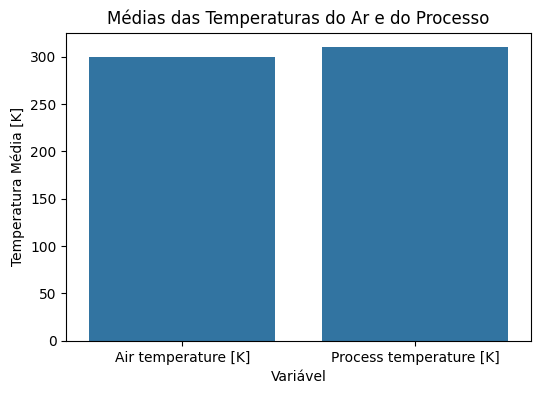

In [55]:
# Gráfico das médias dos atributos Temperatura do Ar e do Processo

# Variáveis que você quer plotar as médias
variables_to_plot = ['Air temperature [K]', 'Process temperature [K]']

# Extrair as médias para essas variáveis
df_mean = df.describe().loc['mean']
mean_values = df_mean[variables_to_plot]

# Preparar o gráfico
plt.figure(figsize=(6, 4))
sns.barplot(x=mean_values.index, y=mean_values.values)
plt.title('Médias das Temperaturas do Ar e do Processo')
plt.ylabel('Temperatura Média [K]')
plt.xlabel('Variável')

# Mostrar o gráfico
plt.show()

O gráfico de barras acima compara as médias das duas variáveis de temperatura: 'Air temperature [K]' e 'Process temperature [K]'.

Ele mostra que a 'Process temperature [K]' possui uma média superior à 'Air temperature [K]'.

A média da Temperatura do Ar está próxima de 300 K, enquanto a da Temperatura do Processo está acima de 300 K.

### 3.3.2. Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [56]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
UDI,2886.895680
Air temperature [K],2.000259
Process temperature [K],1.483734
Rotational speed [rpm],179.284096
Torque [Nm],9.968934
Tool wear [min],63.654147
Machine failure,0.180981
TWF,0.067671
HDF,0.106625
PWF,0.097009


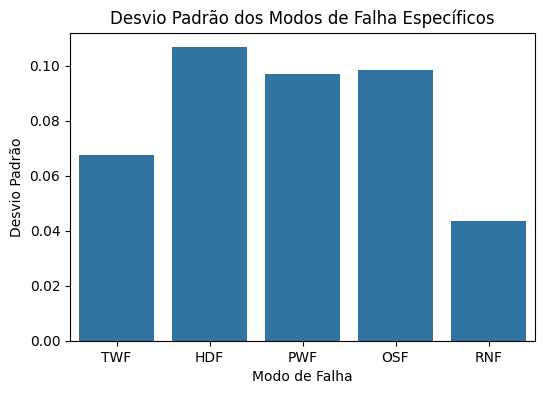

In [57]:
# Gráfico dos modos de falha

# Variáveis dos modos de falha que você quer plotar os desvios padrão
failure_modes_to_plot = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Extrair os desvios padrão para essas variáveis
df_std = df.describe().loc['std']
std_values = df_std[failure_modes_to_plot]

# Preparar o gráfico
plt.figure(figsize=(6, 4))
sns.barplot(x=std_values.index, y=std_values.values)
plt.title('Desvio Padrão dos Modos de Falha Específicos')
plt.ylabel('Desvio Padrão')
plt.xlabel('Modo de Falha')

# Mostrar o gráfico
plt.show()

O gráfico acima apresenta o desvio padrão de cada um dos modos de falha específicos:

***HDF*** (Heat Dissipation Failure) exibe o maior desvio padrão, com um valor acima de 0.10, indicando maior variabilidade em suas ocorrências ou medições.

***PWF*** (Power Failure) e OSF (Overstrain Failure) têm desvios padrão muito próximos, ambos ligeiramente abaixo de 0.10, mostrando uma variabilidade similar e considerável.

***TWF*** (Tool Wear Failure) possui um desvio padrão em torno de 0.065, sugerindo menor dispersão em comparação com HDF, PWF e OSF.

***RNF*** (Random Failures) apresenta o menor desvio padrão entre todos os modos de falha, com um valor abaixo de 0.05, indicando que a variabilidade de suas ocorrências é a mais baixa.

Em resumo, os modos de falha relacionados a calor, potência e sobrecarga (HDF, PWF, OSF) mostram maior variabilidade, enquanto falhas por desgaste de ferramenta e falhas aleatórias (TWF, RNF) demonstram menor dispersão em seus dados.

## 3.4. Análises Gráficas

### 3.4.1. Distribuição dos Tipos de Produto

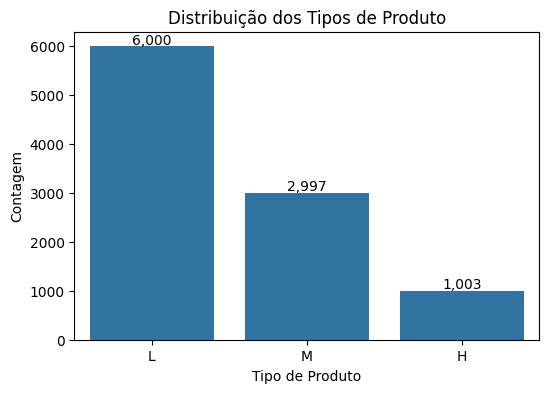

In [58]:
plt.figure(figsize=(6, 4))

# Ordena os tipos pelo número de ocorrências (do maior para o menor)
order = df['Type'].value_counts().sort_values(ascending=False).index

# Gráfico com a ordem definida
ax = sns.countplot(x='Type', data=df, order=order)

plt.title('Distribuição dos Tipos de Produto')
plt.xlabel('Tipo de Produto')
plt.ylabel('Contagem')

# Adiciona os rótulos de dados em cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50,
            '{:,.0f}'.format(height), ha='center')

# Mostrar o gráfico
plt.show()


Conforme descrito na etapa Atributos do Dataset, o gráfico de barras acima revela uma distribuição desigual entre os tipos de produto. O tipo L é o mais frequente, com 6.000 instâncias, seguido pelo tipo M, com 2.997 instâncias. O tipo H aparece com apenas 1.003 instâncias, sendo a classe menos representada. Esses dados indicam que o dataset é desbalanceado em relação à variável categórica 'Type'.

### 3.4.2. Distribuição das Falhas da máquina

Machine failure
0    9661
1     339
Name: count, dtype: int64


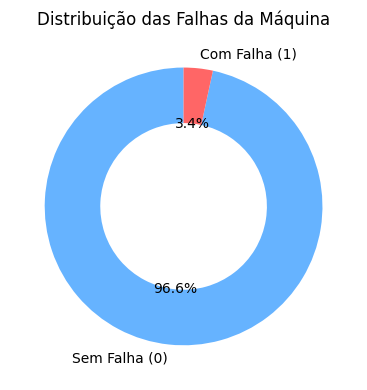

In [59]:
# Conta a frequência das falhas
failure_counts = df['Machine failure'].value_counts()

# Define os rótulos personalizados
labels = ['Sem Falha (0)', 'Com Falha (1)']
colors = ['#66b3ff', '#ff6666']

# Cria o gráfico de rosca
plt.figure(figsize=(4, 4))
plt.pie(failure_counts,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'width': 0.4})  # Espessura da rosca

plt.title('Distribuição das Falhas da Máquina')
plt.tight_layout()

# Mostrar o total de falhas
print(failure_counts)

# Mostar o gráfico de rosca
plt.show()

O gráfico de rosca acima representa o percentual do total de falhas que ocorreram, resultados da contagem da variável binária Machine Failure, com 0 representando que não houve falhas e 1 representando uma falha no equipamento, podendo a falha ser de 1 ou mais tipos. Como pode-se observar, tivemos falhas em 3,4% do universo da amostra (339/10.000) registros.

### 3.4.3. Contagem dos Modos de Falha

373


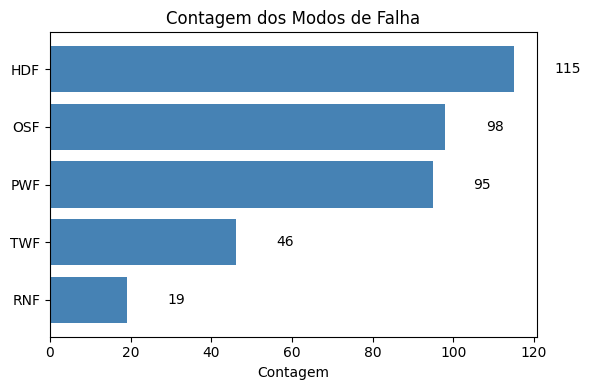

In [60]:
# Lista dos modos de falha
failure_modes = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Conta quantas vezes cada falha ocorreu
failure_counts = df[failure_modes].sum().sort_values(ascending=True)

# Cria o gráfico de barras horizontal
plt.figure(figsize=(6, 4))
bars = plt.barh(failure_counts.index, failure_counts.values, color='steelblue')

# Adiciona os rótulos de dados ao lado das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', va='center')

plt.xlabel('Contagem')
plt.title('Contagem dos Modos de Falha')
plt.tight_layout()

# Mostrar o total de falhas
print(sum(failure_counts))

# Mostar o gráfico de barras horizontal
plt.show()

O gráfico de barras horizontais acima nos mostra a contagem de falhas para cada um dos 5 modos de falha possíveis: desgaste da ferramenta (TWF), dissipação de calor (HDF), potência (PWF), sobrecarga (OSF) ou falhas aleatórias (RNF). A falha que mais ocorreu foi a falha por dissipação de calor, com 115 registros, seguida pela falha por sobrecarga, com 98 registros, sendo esses 2 modos, responsáveis por mais da metade da falhas ocorridas. Um outro fato interessante dessa análise foi que identificamos um total 373 falhas, diferente das 339 falhas do gráfico anterior, o que reforça que mais de uma falha pode ocorrer no mesmo equipamento.

### 3.4.4. Histogramas

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

##### 3.4.4.1. Temperatura do Ar

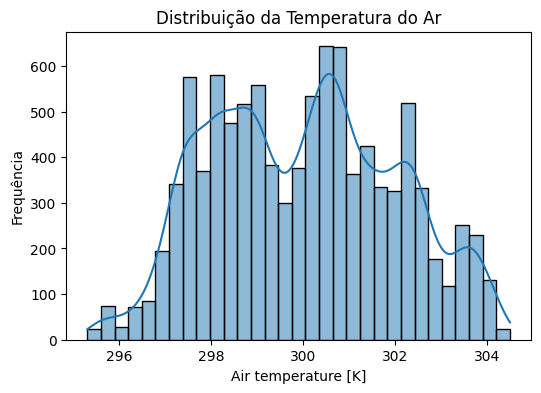

In [61]:
plt.figure(figsize=(6, 4))
# Histograma da Temperatura do Ar
sns.histplot(df['Air temperature [K]'], kde=True)
plt.title('Distribuição da Temperatura do Ar')
plt.xlabel('Air temperature [K]')
plt.ylabel('Frequência')
plt.show()

A curva de densidade estimada (KDE) sobreposta fornece uma visualização mais suave da forma da distribuição.

Com base na curva de densidade, a distribuição da temperatura do ar neste conjunto de dados parece ser multimodal, com pelo menos dois ou até três picos distintos. Há um pico proeminente em torno de 298 K, outro pico significativo por volta de 301 K, e um terceiro pico menor e mais amplo por volta de 303 K a 304 K.

Essa característica multimodal sugere que as temperaturas do ar não se concentram em torno de um único valor médio, mas sim em torno de múltiplos pontos. Isso poderia indicar, por exemplo, que os dados foram coletados sob diferentes condições ambientais, em distintos momentos do dia (manhã, tarde, noite) ou em estações diferentes (temperaturas mais baixas em um período e mais altas em outro), que influenciam as temperaturas do ar de forma distinta. A presença de múltiplos picos implica que há subgrupos de observações, cada um com sua própria concentração de temperaturas.

##### 3.4.4.2. Temperatura do Processo

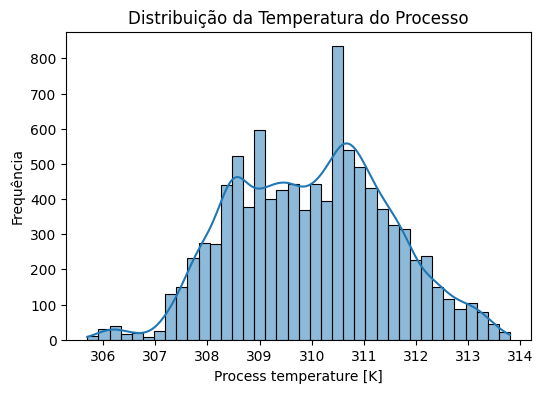

In [62]:
plt.figure(figsize=(6, 4))
# Histograma da Temperatura do Processo
sns.histplot(df['Process temperature [K]'], kde=True)
plt.title('Distribuição da Temperatura do Processo')
plt.xlabel('Process temperature [K]')
plt.ylabel('Frequência')
plt.show()

A curva de densidade estimada (KDE) sobreposta fornece uma representação suave da forma da distribuição.

Com base na curva de densidade, a distribuição da temperatura do processo parece ser bimodal, com dois picos distintos. O primeiro pico mais proeminente está localizado em torno de 310.5 K, indicando uma concentração significativa de temperaturas do processo nesse valor. Há também um segundo pico notável, embora menos alto, por volta de 309 K.

A presença desses dois picos sugere que o processo pode estar operando sob duas condições ou modos distintos, cada um com sua própria faixa de temperatura característica. Isso poderia indicar, por exemplo, diferentes configurações do processo, fases de operação, ou até mesmo a influência de dois fatores predominantes que afetam a temperatura. A existência de uma distribuição bimodal implica que as temperaturas do processo não são controladas em torno de um único ponto ideal, mas sim oscilam entre dois valores centrais, ou que há dois "estados" predominantes para a temperatura do processo.

##### 3.4.4.3. Velocidade Rotational

A Velocidade de Rotação (rpm) de um equipamento é uma medida que indica o número de voltas completas que um componente giratório (como um motor, uma engrenagem, ou um eixo) realiza em um minuto.
Em máquinas industriais, uma rpm excessiva pode causar falhas catastróficas, enquanto uma rpm muito baixa pode indicar problemas de funcionamento que podem levar a avarias.
Operar um equipamento na rpm inadequada (muito alta ou muito baixa) pode causar desgaste excessivo das peças e reduzir a vida útil do motor ou dos componentes.
Monitorar a rpm permite identificar comportamentos anormais que podem indicar a necessidade de manutenção preventiva, evitando problemas mais graves e custos elevados de reparo.

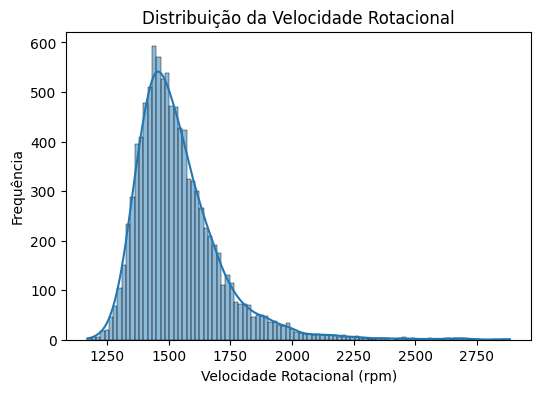

In [63]:
plt.figure(figsize=(6, 4))
# Histograma da Velocidade Rotacional
sns.histplot(df['Rotational speed [rpm]'], kde=True)
plt.title('Distribuição da Velocidade Rotacional')
plt.xlabel('Velocidade Rotacional (rpm)')
plt.ylabel('Frequência')
plt.show()

Com base na curva de densidade, a distribuição da velocidade rotacional parece ser unimodal, com um pico claro por volta de 1500 rpm. Isso sugere que a maioria dos valores de velocidade rotacional se concentra em torno desse valor central. A distribuição é assimétrica, com uma cauda mais longa para a direita (valores mais altos de rpm), indicando que, embora a maioria dos dados esteja próxima de 1500 rpm, existem alguns registros com velocidades rotacionais significativamente maiores, mas em menor frequência.

##### 3.4.4.4. Torque

O Torque é a medida da tendência de uma força em fazer um objeto girar em torno de um eixo ou ponto de rotação.
O torque é fundamental para o funcionamento e desempenho de diversos equipamentos, especialmente aqueles que envolvem movimento de rotação.

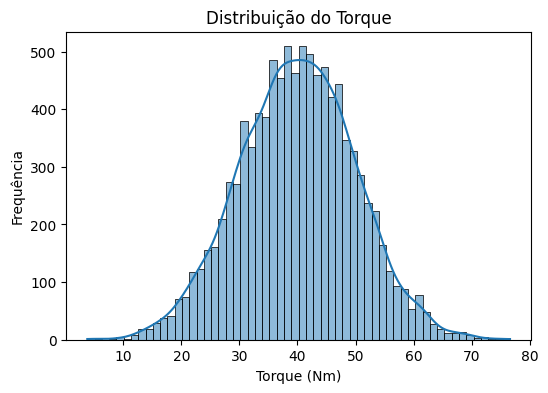

In [64]:
plt.figure(figsize=(6, 4))
# Histograma do Torque
sns.histplot(df['Torque [Nm]'], kde=True)
plt.title('Distribuição do Torque')
plt.xlabel('Torque (Nm)')
plt.ylabel('Frequência')
plt.show()

A curva de densidade estimada (KDE) que acompanha o histograma nos permite analisar a forma dessa distribuição.

Com base na curva de densidade, a distribuição do torque apresenta uma forma que se assemelha bastante a uma distribuição normal (ou gaussiana). Ela é unimodal, com um pico central evidente em torno de 40 Nm. Isso sugere que a maioria dos valores de torque se concentra em torno desse valor médio. A distribuição parece ser relativamente simétrica em torno de seu pico, com as frequências diminuindo gradualmente à medida que os valores de torque se afastam do centro, tanto para valores menores quanto para valores maiores.

Essa característica de uma distribuição unimodal e aproximadamente simétrica, com a maioria dos dados agrupada em torno de uma média, é comum em muitos processos naturais e manufaturados, indicando uma variação esperada do torque em torno de um valor típico, sem a presença de múltiplos grupos ou subpopulações distintas de torque.

##### 3.4.4.5. Desgaste da ferramenta

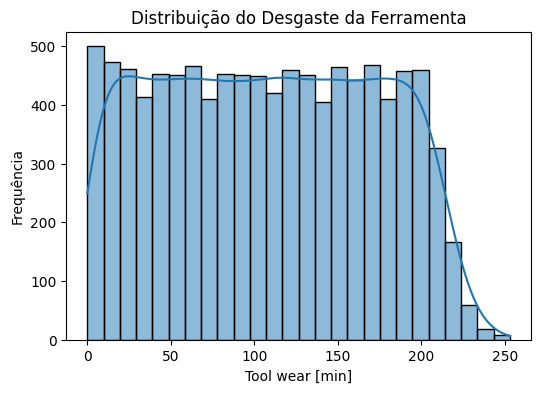

In [65]:
plt.figure(figsize=(6, 4))
# Histograma do Torque
sns.histplot(df['Tool wear [min]'], kde=True)
plt.title('Distribuição do Desgaste da Ferramenta')
plt.xlabel('Tool wear [min]')
plt.ylabel('Frequência')
plt.show()

Neste histograma, a distribuição do desgaste da ferramenta mostra uma característica bastante distinta. A frequência dos dados é relativamente constante em um patamar elevado para a maior parte do intervalo de tempo, desde valores próximos a 0 minutos até aproximadamente 200 minutos. Isso é visível na curva de densidade, que se mantém relativamente plana e alta nessa faixa.

Após os 200 minutos, há uma queda abrupta na frequência, indicando que a ocorrência de desgastes superiores a esse valor é significativamente menor. A curva de densidade reflete essa queda acentuada, aproximando-se de zero à medida que o tempo de desgaste aumenta além de 200 minutos.

Essa forma de distribuição sugere que a ferramenta mantém um nível consistente de uso até um determinado ponto (aproximadamente 200 minutos), após o qual sua "vida útil" ou a frequência de observação do desgaste diminui drasticamente. Isso pode indicar um limite de vida útil ou um ponto a partir do qual as ferramentas são geralmente substituídas ou falham, resultando em menos observações de desgaste em tempos mais longos. Em contraste com as distribuições unimodais ou simétricas, esta distribuição é mais uniforme em sua porção inicial e depois exibe uma queda acentuada, não se encaixando em padrões típicos como a distribuição normal.

### 3.4.5. Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


In [66]:
# Estatísticas descritivas agrupadas por Tipo de produto
df.groupby('Type').describe()

UDI                                                           \
       count         mean          std   min     25%     50%      75%   
Type                                                                    
H     1003.0  4981.918245  3013.238847  11.0  2212.0  4925.0  7703.00   
L     6000.0  4990.747667  2874.878396   2.0  2512.5  4977.5  7495.25   
M     2997.0  5026.242910  2868.465583   1.0  2573.0  5035.0  7457.00   

              Air temperature [K]              ...  OSF          RNF  \
          max               count        mean  ...  75%  max   count   
Type                                           ...                     
H      9999.0              1003.0  299.866999  ...  0.0  1.0  1003.0   
L      9995.0              6000.0  300.015833  ...  0.0  1.0  6000.0   
M     10000.0              2997.0  300.029263  ...  0.0  1.0  2997.0   

                                                   
          mean       std  min  25%  50%  75%  max  
Type                                               
H     0.003988  0.063056  0.0  0.0  0.0  0.0  1.0  
L     0.002167  0.046501  0.0  0.0  0.0  0.0  1.0  
M     0.000667  0.025828  0.0  0.0  0.0  0.0  1.0  

[3 rows x 96 columns]

##### 3.4.5.1. Desgaste da ferramenta x Falha da máquina


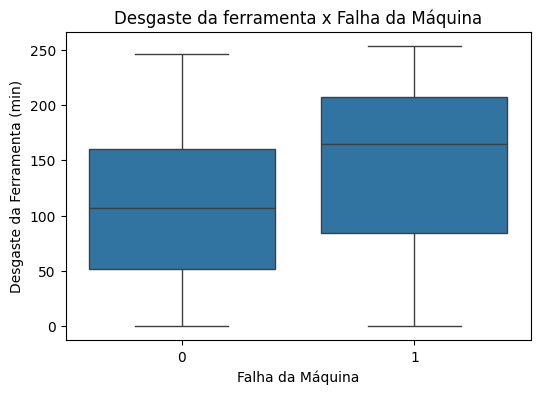

In [67]:
 # Relação entre desgaste da ferramenta vs falha da máquina
plt.figure(figsize=(6, 4))
sns.boxplot(x='Machine failure', y='Tool wear [min]', data=df)
plt.title('Desgaste da ferramenta x Falha da Máquina')
plt.xlabel('Falha da Máquina')
plt.ylabel('Desgaste da Ferramenta (min)')

# Mostrar o boxplot
plt.show()

"O boxplot acima compara a distribuição do "Desgaste da Ferramenta (min)" para dois grupos:

Falha da Máquina = 0 (Máquina NÃO falhou)

Falha da Máquina = 1 (Máquina FALHOU)
Ao analisar o gráfico, observamos o seguinte:

***Mediana*** (linha central da caixa):

Para máquinas que não falharam (0), a linha da mediana (que representa o valor central dos dados) está em torno de 110 minutos de desgaste da ferramenta.

Para máquinas que falharam (1), a linha da mediana está visivelmente mais alta, em torno de 165 minutos de desgaste da ferramenta.
Isso indica que, em média, as máquinas que falharam tiveram um desgaste da ferramenta significativamente maior.

***Caixa*** (Intervalo Interquartil - IQR):

A caixa representa os 50% centrais dos dados (do 25º ao 75º percentil).

Para máquinas que não falharam (0), a maior parte dos dados de desgaste da ferramenta está concentrada entre aproximadamente 55 e 160 minutos.

Para máquinas que falharam (1), a maior parte dos dados de desgaste da ferramenta está concentrada entre aproximadamente 90 e 210 minutos.
Isso mostra que a distribuição do desgaste para máquinas que falharam está deslocada para valores mais altos.

***Bigodes*** (whiskers):

Os bigodes estendem-se da caixa para indicar a dispersão geral dos dados, excluindo outliers.

Para máquinas que não falharam (0), o bigode superior atinge cerca de 245 minutos e o bigode inferior se estende até próximo de 0 minutos.

Para máquinas que falharam (1), o bigode superior também atinge cerca de 255 minutos e o bigode inferior se estende até próximo de 0 minutos.
Apesar dos bigodes inferiores de ambos os grupos se estenderem até valores muito baixos, a principal diferença na distribuição reside nas medianas e nos intervalos interquartis (caixas), que estão claramente deslocados para valores mais altos no grupo que falhou, indicando que a massa principal dos dados de desgaste das máquinas que falharam é significativamente maior."

##### 3.4.5.2. Velocidade Rotacional x Falha da máquina

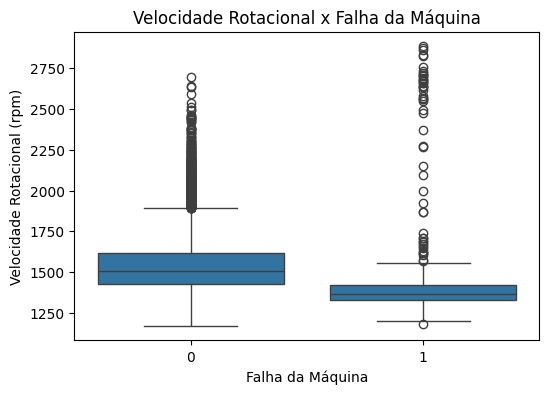

In [68]:
# Velocidade rotacional x falha da máquina
plt.figure(figsize=(6, 4))
sns.boxplot(x='Machine failure', y='Rotational speed [rpm]', data=df)
plt.title('Velocidade Rotacional x Falha da Máquina')
plt.xlabel('Falha da Máquina')
plt.ylabel('Velocidade Rotacional (rpm)')

# Mostrar o gráfico
plt.show()

"O box plot acima compara a distribuição da "Velocidade Rotacional (rpm)" para dois grupos:

Falha da Máquina = 0 (Máquina NÃO falhou)

Falha da Máquina = 1 (Máquina FALHOU)

Ao analisar o gráfico, observamos o seguinte:

***Mediana*** (linha central da caixa):

Para máquinas que não falharam (0), a mediana da velocidade rotacional está em torno de 1500 rpm.

Para máquinas que falharam (1), a mediana da velocidade rotacional está notavelmente mais baixa, em torno de 1400 rpm. Isso sugere que, em média, as falhas ocorrem em velocidades rotacionais mais baixas.

***Dispersão e Outliers*** (pontos fora dos bigodes):

Falha = 0 (Não falhou): A distribuição da velocidade rotacional é mais compacta, com a maioria dos dados (dentro dos bigodes) entre aproximadamente 1200 rpm e 1900 rpm. No entanto, há uma concentração significativa de outliers de alta velocidade (pontos acima do bigode superior), que se estendem até cerca de 2750 rpm. Esses são casos de não-falha que ocorrem em velocidades rotacionais muito elevadas.

Falha = 1 (Falhou): A distribuição central (caixa e bigodes) da velocidade rotacional é mais baixa (entre aproximadamente 1200 rpm e 1550 rpm). Mais crucialmente, há uma grande quantidade de outliers de alta velocidade (pontos acima do bigode superior), que também se estendem até cerca de 2800 rpm. A presença desses outliers em alta velocidade é particularmente notável para as máquinas que falharam.

***Análise complementar das velocidades e falhas***

***Velocidades Muito Baixas e Falhas:*** O box plot mostra que a mediana da velocidade para máquinas que falharam (1) é menor do que para máquinas que não falharam (0). Isso, por si só, já indica que velocidades mais baixas estão associadas a falhas, embora não necessariamente "muito baixas" em um sentido extremo. O bigode inferior de ambos os grupos atinge valores semelhantes, o que não mostra uma concentração de falhas apenas nas velocidades extremamente baixas.

***Velocidades Muito Altas e Falhas:*** Embora a maioria das falhas ocorra em velocidades mais baixas (mediana e quartis inferiores), a presença proeminente de outliers de alta velocidade (pontos isolados acima dos bigodes) para as máquinas que falharam (1) é um indicador importante. Isso sugere que, mesmo que a operação típica de falha seja em rotações mais baixas, operar em velocidades rotacionais extremamente altas também aumenta o risco de falha. A densidade de outliers de alta rotação parece ser maior ou mais proeminente no grupo de falhas (1) do que no grupo sem falhas (0)."

### 3.4.6. Matriz de Correlação e Mapa de Calor

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [69]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.iloc[:, 3:9].corr()


Matriz de Correlação:


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Machine failure,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


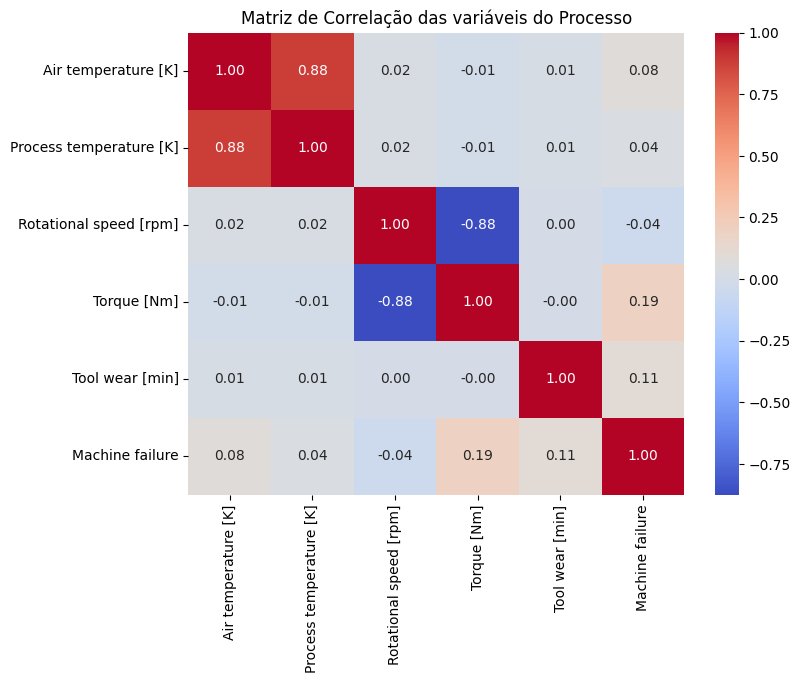

In [70]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df.iloc[:, 3:9].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das variáveis do Processo')
plt.show()

O mapa de calor "Matriz de Correlação das variáveis do Processo" mostra a relação entre diferentes variáveis do processo estudado.

***Pontos-chave:***

***Correlações Positivas Fortes (vermelho):***

Temperatura do Ar e Temperatura do Processo (0.88): Há uma forte correlação positiva, indicando que quando a temperatura do ar aumenta, a do processo também tende a aumentar.

***Correlações Negativas Fortes (azul):***

Velocidade Rotacional e Torque (-0.88): Apresentam uma forte correlação negativa, sugerindo que à medida que a velocidade rotacional aumenta, o torque tende a diminuir, e vice-versa.

***Correlações Fracas (cinza/branco, próximo a 0):***

A maioria das outras variáveis (como as temperaturas com velocidade/torque/desgaste/falha, e velocidade/torque com desgaste da ferramenta) mostram correlações muito próximas de zero. Isso indica que não há uma relação linear forte ou previsível entre elas.

Desgaste da Ferramenta e Falha da Máquina (0.11): Embora positiva, a correlação é fraca, sugerindo que o desgaste da ferramenta, por si só, não é um forte preditor linear da falha da máquina neste conjunto de dados.

Em resumo, o mapa de calor revela as duas principais dependências: a temperatura do ar está diretamente ligada à temperatura do processo, e a velocidade rotacional tem uma relação inversa forte com o torque. As outras variáveis mostram pouca ou nenhuma correlação linear entre si ou com a falha da máquina.

### 3.4.7. Outros gráficos

##### 3.4.7.1. Torque e Temperatura do Processo *versus* Falha da Máquina

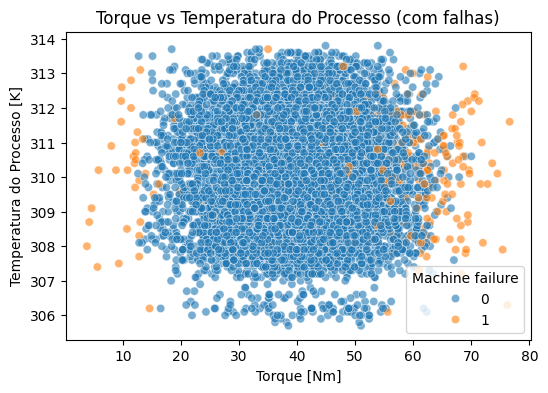

In [71]:
# temperatura + torque vs falha da máquina
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Torque [Nm]', y='Process temperature [K]', hue='Machine failure', alpha=0.6)
plt.title('Torque vs Temperatura do Processo (com falhas)')
plt.xlabel('Torque [Nm]')
plt.ylabel('Temperatura do Processo [K]')

# Mostrar o gráfico
plt.show()

"O gráfico de dispersão (scatter plot) mostra a relação entre "Torque [Nm]" no eixo X e "Temperatura do Processo [K]" no eixo Y, com pontos coloridos indicando se houve "Machine failure" (Falha da Máquina):

Azul (0): Máquina NÃO falhou.

Laranja (1): Máquina FALHOU.

Ao observar a distribuição dos pontos laranjas (máquinas que falharam) no gráfico, notamos o seguinte:

Distribuição dos pontos laranjas: A maioria dos pontos laranjas (representando falhas) não está uniformemente distribuída por todo o gráfico. Em vez disso, eles tendem a se agrupar em certas áreas.

Regiões de Alta Temperatura e Alto Torque:

No canto superior direito do gráfico, onde tanto o Torque quanto a Temperatura do Processo são altos (por exemplo, Torque acima de 60 Nm e Temperatura acima de 310 K), há uma concentração visível de pontos laranjas.

No canto inferior esquerdo, onde ambos são baixos, quase não há pontos laranjas. A maioria dos pontos azuis (sem falha) está mais centralizada.

Bordas da Nuvem de Dados: Os pontos de falha (laranjas) parecem ocorrer mais nas "bordas" da nuvem de dados, especialmente nas extremidades de altos valores para ambas as variáveis. Embora haja algumas falhas em outras regiões, a densidade de falhas é notavelmente maior nas áreas de torque e temperatura elevados."

##### 3.4.7.2. Taxa Média de Falha por Tipo de Produto

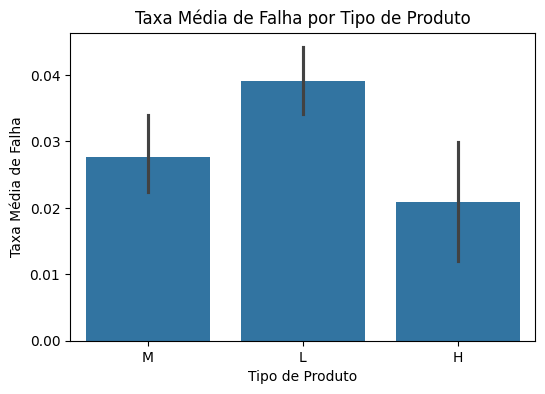

In [72]:
#  Tipo de produto x taxa média de falha
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Type', y='Machine failure', estimator=lambda x: sum(x)/len(x))
plt.title('Taxa Média de Falha por Tipo de Produto')
plt.xlabel('Tipo de Produto')
plt.ylabel('Taxa Média de Falha')

# Mostrar o gráfico
plt.show()

"O gráfico de barras acima mostra a "Taxa Média de Falha" para diferentes "Tipos de Produto":

L: Tipo de produto - Qualidade "Baixa"

M: Tipo de produto - Qualidade "Média"

H: Tipo de produto - Qualidade "Alta"

Ao analisar as alturas das barras e as barras de erro, observamos o seguinte:

***Tipo de Produto 'L'***: Apresenta a maior taxa média de falha, visivelmente acima de 0.035 (aproximadamente 0.039 ou 3.9%). A barra de erro para este tipo de produto também é notável, indicando alguma variabilidade, mas a média é claramente a mais alta.

***Tipo de Produto 'M'***: A taxa média de falha para este tipo de produto está em torno de 0.027 (aproximadamente 2.7%). É a segunda maior taxa, significativamente menor que 'L', mas maior que 'H'.

***Tipo de Produto 'H'***: Apresenta a menor taxa média de falha, em torno de 0.021 (aproximadamente 2.1%). Curiosamente, um produto que poderia intuitivamente 'exigir mais do equipamento' (tipo 'H') mostra a menor taxa de falha média neste conjunto de dados. Isso pode indicar que máquinas projetadas para produtos 'H' são mais robustas ou que os processos para 'H' são mais controlados.

##### 3.4.7.3. Correlação entre Falhas Específicas e Falha Geral

HDF    0.575800
OSF    0.531083
PWF    0.522812
TWF    0.362904
RNF    0.004516
Name: Machine failure, dtype: float64


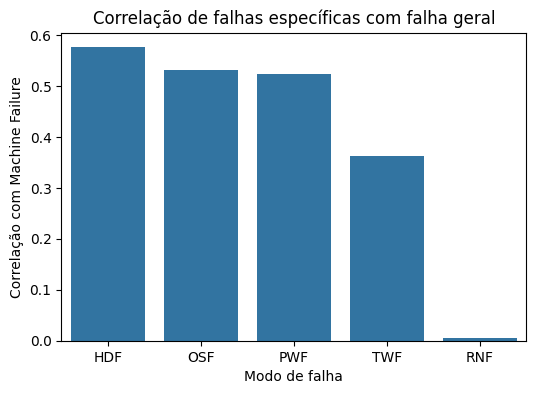

In [73]:
# Correlação entre falhas específicas e falha geral
fail_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_correlation = df[fail_cols + ['Machine failure']].corr()['Machine failure'].drop('Machine failure').sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=failure_correlation.index, y=failure_correlation.values)
plt.title('Correlação de falhas específicas com falha geral')
plt.xlabel('Modo de falha')
plt.ylabel('Correlação com Machine Failure')

# Mostrar os valores das correlações
print(failure_correlation)

# Mostrar o gráfico
plt.show()

O gráfico de barras acima mostra a correlação de diferentes modos de falha específicos (HDF, OSF, PWF, TWF, RNF) com a "Machine Failure" (falha geral da máquina). A altura de cada barra indica o coeficiente de correlação, que varia de 0 a 1 (já que são todas correlações positivas neste gráfico).
Vamos interpretar os resultados para cada tipo de falha específica:

***HDF*** (Heat Dissipation Failure - Falha por Dissipação de Calor): Apresenta a maior correlação com a falha geral da máquina, com um valor próximo de 0.58. Isso indica uma correlação forte e positiva.

***OSF*** (Overstrain Failure - Falha por Sobrecarga): Possui uma correlação muito alta, próxima de 0.53. Também é uma correlação forte e positiva.

***PWF*** (Power Failure - Falha de Energia): Apresenta uma correlação muito alta, próxima de 0.52. Similarmente, uma correlação forte e positiva.

***TWF*** (Tool Wear Failure - Falha por Desgaste da Ferramenta): Tem uma correlação moderada, em torno de 0.36. Ainda é uma correlação positiva, mas menos forte que as anteriores.

***RNF*** (Random Failures - Falhas Aleatórias): Possui uma correlação praticamente nula ou muito próxima de zero, indicando que não há uma relação linear discernível entre falhas aleatórias e a falha geral da máquina.

# 4. Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [74]:
# Separar features (X) e target (y)
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']

In [75]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [76]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (7000, 13)
Dimensões de X_test: (3000, 13)
Dimensões de y_train: (7000,)
Dimensões de y_test: (3000,)


## 4.1. Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [77]:
# Seleciona colunas numéricas que farão parte da transformação (modos de falha)
num_cols = ['Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

In [78]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [79]:

# Aprende min e max APENAS das colunas numéricas de X_train
scaler_norm.fit(X_train[num_cols])

# Transforma as colunas numéricas de X_train e X_test
X_train_normalized = scaler_norm.transform(X_train[num_cols])
X_test_normalized = scaler_norm.transform(X_test[num_cols])

In [80]:
# Armazena os dados em um DataFrames com as colunas normalizadas e exibe as primeiras linhas
df_normalized_train = pd.DataFrame(X_train_normalized, columns=num_cols)
df_normalized_test = pd.DataFrame(X_test_normalized, columns=num_cols)

print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
df_normalized_train.head()


Primeiras 5 linhas dos dados normalizados (treino):


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.271739,0.209877,0.427241,0.281593,0.509881
1,0.913043,0.814815,0.105355,0.648352,0.415020
2,0.206522,0.271605,0.189173,0.475275,0.577075
3,0.902174,0.814815,0.268917,0.392857,0.881423
4,0.608696,0.765432,0.565774,0.174451,0.169960


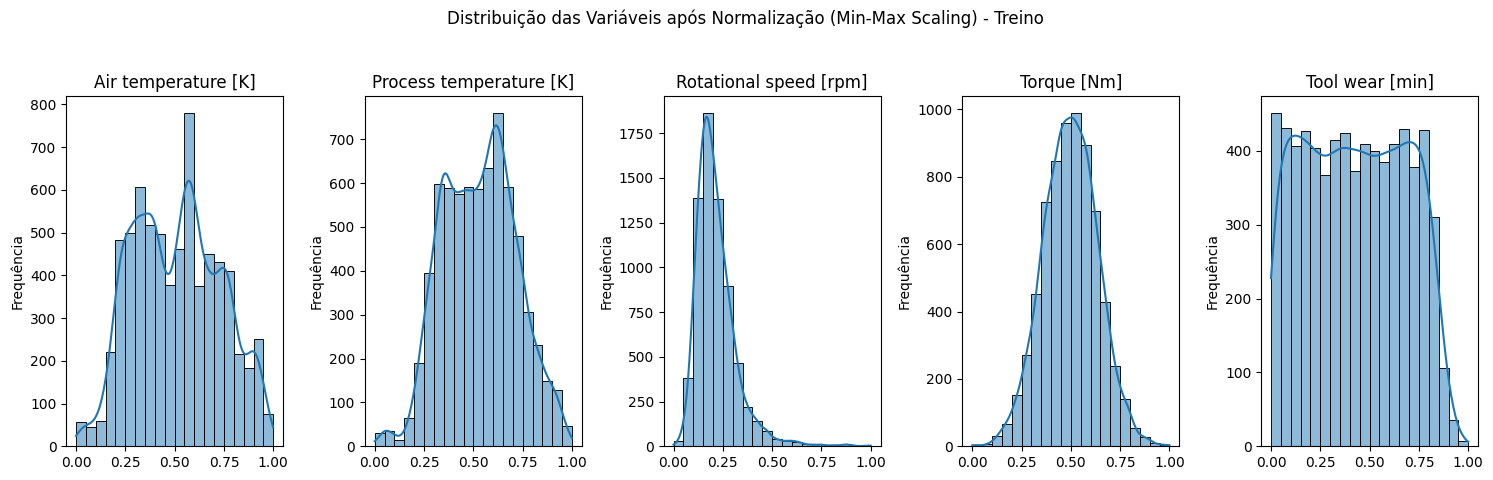

In [81]:
# Geração de Histograma para os Dados Normalizados (Conjunto de Treino)
plt.figure(figsize=(15, 5))
plt.suptitle('Distribuição das Variáveis após Normalização (Min-Max Scaling) - Treino')
for i, col in enumerate(df_normalized_train.columns):
    plt.subplot(1, len(df_normalized_train.columns), i + 1)
    sns.histplot(df_normalized_train[col], kde=True, bins=20)
    plt.title(col)
    plt.xlabel("") # Remove o label do eixo x para não poluir
    plt.ylabel("Frequência")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta o layout
plt.show()

Os histogramas dos modos de falha após a normalização mostram que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## 4.2. Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [82]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [83]:
# Aprende média e desvio padrão APENAS das colunas numéricas de X_train
scaler_std.fit(X_train[num_cols])

# Transforma as colunas numéricas de X_train e X_test
X_train_standardized = scaler_std.transform(X_train[num_cols])
X_test_standardized = scaler_std.transform(X_test[num_cols])

In [84]:
# Armazena os dados em um DataFrames com as colunas padronizadas e exibe as primeiras linhas
df_standardized_train = pd.DataFrame(X_train_standardized, columns=num_cols)
df_standardized_test = pd.DataFrame(X_test_standardized, columns=num_cols)

print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
df_standardized_train.head()


Primeiras 5 linhas dos dados padronizados (treino):


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,-1.105779,-1.759415,2.012835,-1.569298,0.334742
1,1.840492,1.547973,-1.055557,1.099287,-0.041084
2,-1.405400,-1.421926,-0.256554,-0.160045,0.600952
3,1.790556,1.547973,0.503608,-0.759727,1.806727
4,0.442262,1.277982,3.333409,-2.348885,-1.011967


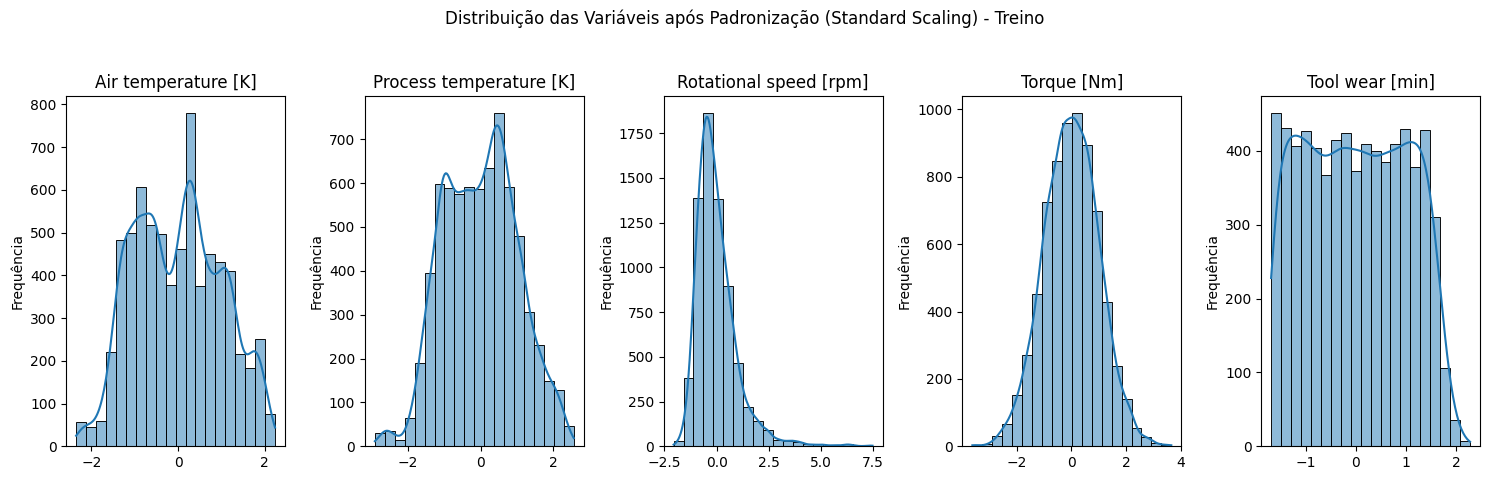

In [85]:
# Geração de Histograma para os Dados Padronizados (Conjunto de Treino)
plt.figure(figsize=(15, 5))
plt.suptitle('Distribuição das Variáveis após Padronização (Standard Scaling) - Treino')
for i, col in enumerate(df_standardized_train.columns):
    plt.subplot(1, len(df_standardized_train.columns), i + 1)
    sns.histplot(df_standardized_train[col], kde=True, bins=20)
    plt.title(col)
    plt.xlabel("") # Remove o label do eixo x para não poluir
    plt.ylabel("Frequência")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta o layout
plt.show()

Os histogramas dos modos de falha após a padronização mostram que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## 4.3. Outras Transformações e Etapas de Pré-Processamento

A seguir são apresentadas outras etapas de pré-processamento aplicadas ao dataset, como por exemplo, importância dos atributos, redução de dimensionalidade (como PCA) e criação de novas características.



### 4.3.1. Importância de atributos (Random Forest)

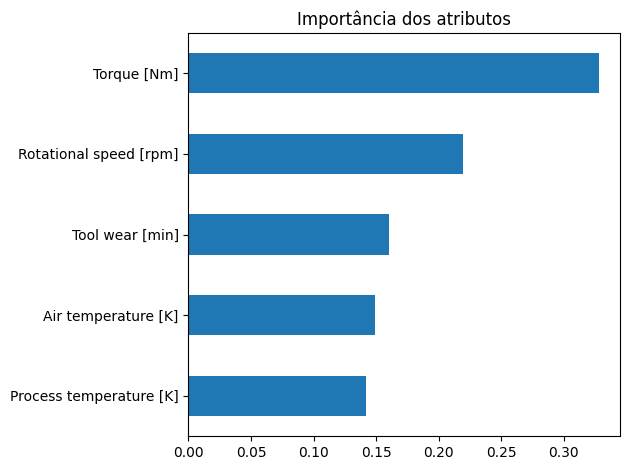

In [86]:
X = df[num_cols]
X = pd.get_dummies(X, drop_first=True)
y = df['Machine failure']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', title='Importância dos atributos')
plt.tight_layout()
plt.show()

O gráfico acima exibe a importância relativa de cada variável no processo de previsão de falha da máquina (Machine failure) conforme avaliado por um modelo de Random Forest.

Eixo Y: Nomes dos atributos usados como entrada no modelo.

Eixo X: Importância atribuída a cada atributo, ou seja, quanto aquela variável contribui para reduzir a incerteza (impureza) nas decisões.

***Principais conclusões com base no gráfico:***

Variáveis com maior importância:

- Torque [Nm]: É o atributo mais importante para o modelo, indicando que variações no torque têm forte relação com a ocorrência de falhas.

- Rotational speed [rpm] e Tool wear [min]: Também aparecem com alta importância — ambos fazem sentido em contexto industrial, pois rotação e desgaste excessivo impactam diretamente o desempenho e a durabilidade dos componentes.

Temperatura:

Air temperature [K] e Process temperature [K] têm importância moderada, o que sugere que, embora relevantes, não são tão decisivas quanto os atributos mecânicos.

***Conclusão:***
O modelo Random Forest atribui maior valor a variáveis numéricas contínuas relacionadas a esforço mecânico e operação.

Isso valida o uso de atributos como Torque, Rotational Speed e Tool Wear em modelos de previsão de falhas.

O gráfico também ajuda a fazer feature selection automática, descartando variáveis pouco úteis para simplificar modelos futuros.

### 4.3.2. Redução de dimensionalidade (PCA)

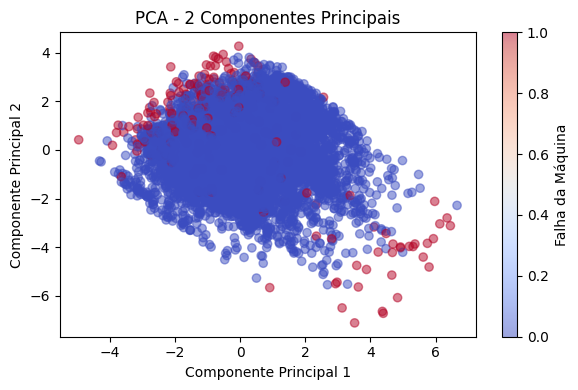

In [87]:
# Padroniza os dados numéricos antes do PCA
X_std = scaler_std.fit_transform(df[num_cols])

pca = PCA(n_components=2)
components = pca.fit_transform(X_std)

# Visualização
plt.figure(figsize=(6, 4))
plt.scatter(components[:, 0], components[:, 1], c=df['Machine failure'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - 2 Componentes Principais')
plt.colorbar(label='Falha da Máquina')
plt.tight_layout()
plt.show()

Este gráfico mostra os dados transformados pelos 2 primeiros componentes principais extraídos por PCA, uma técnica de redução de dimensionalidade. Cada ponto representa uma instância (registro) do dataset, projetado num plano 2D, mantendo o máximo possível da variância dos dados originais.

Eixo X: Componente Principal 1

Eixo Y: Componente Principal 2

Cores (gradiente de azul a vermelho): Representam o valor da variável Machine failure, onde: Azul = Sem falha (valor 0) e Vermelho = Com falha (valor 1).

***Interpretação dos resultados:***

Distribuição geral:
A maioria dos pontos está concentrada em uma região densa, centralizada em torno de (0,0) nos eixos principais — isso indica alta concentração de registros sem falha, o que é esperado já que o dataset é desbalanceado (apenas ~3,4% de falhas).

Pontos vermelhos (falhas):
Embora mais dispersos, há regiões da projeção com maior densidade de falhas (vermelhos), especialmente nas bordas superiores e inferiores.

Isso sugere que as falhas possuem padrões distintos em relação às demais instâncias.

### 4.3.3. Criação de novas características (Feature Engineering)

In [88]:
# Cria as novas features
df['temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']  # Diferença de temperaturas
df['torque_by_speed'] = df['Torque [Nm]'] / (df['Rotational speed [rpm]'] + 1)  # Relação torque/velocidade

# Verifica o dataset com as novas features
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,temp_diff,torque_by_speed
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,0.027577
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,0.032860
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,0.032955
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,0.027545
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,0.028389


Feature Engineering é o processo de criar, transformar ou combinar variáveis (features) do dataset original com o objetivo de melhorar a performance dos modelos de machine learning. É uma das etapas mais importantes da modelagem, pois bons atributos podem revelar padrões ocultos, melhorar a capacidade preditiva do modelo e até reduzir o overfitting.

No caso do dataset AI4I 2020 Predictive Maintenance, foram criadas três novas features:

a) ***temp_diff:***	Mede o ganho térmico no processo — pode indicar anomalias térmicas.

b) ***torque_by_speed:*** Relação entre torque e rotação — útil para detectar esforço excessivo ou travamento.

# 5. Conclusão

A análise e o pré-processamento do dataset AI4I 2020 Predictive Maintenance ressaltaram a importância crítica de uma compreensão aprofundada da estrutura dos dados antes da fase de modelagem. Observamos que, apesar de o dataset ser limpo, ele apresenta um desbalanceamento considerável. Suas características numéricas são bem definidas, o que permitiu identificar padrões e relações significativas para a previsão de falhas.

A análise exploratória foi crucial, revelando correlações importantes entre as diferentes características do maquinário e a ocorrência de falhas. Ferramentas visuais, como histograms, boxplots e gráficos de barras, mostraram-se particularmente eficazes em distinguir as classes e evidenciar essas relações.

Adicionalmente, as etapas de normalização e padronização dos dados se provaram fundamentais. Elas garantiram que o dataset estivesse no formato ideal para os diversos algoritmos de aprendizado de máquina, otimizando seu desempenho e permitindo que os modelos aprendam eficientemente com as nuances e relações presentes nos dados.

As cinco hipóteses levantadas foram validadas e são apresentadas a seguir:

##### 5.1. ***Hipótese 1:*** Máquinas com maior desgaste da ferramenta apresentam maior probabilidade de falha? → Espera-se que o desgaste acumulado ao longo do tempo seja um forte indicador de falha iminente.

Com base na análise do Box Plot, gráfico do item 3.4.5.1., que compara o "Desgaste da Ferramenta" entre máquinas que falharam e não falharam, a hipótese de que máquinas com maior desgaste da ferramenta apresentam maior probabilidade de falha é ***considerada verdadeira***. Observa-se que a distribuição do desgaste da ferramenta para máquinas que falharam está consistentemente deslocada para valores mais altos, com uma mediana significativamente superior em comparação com as máquinas que não falharam. Isso corrobora a expectativa de que o desgaste acumulado da ferramenta é um fator relevante na ocorrência de falhas da máquina.

##### 5.2. ***Hipótese 2:*** A combinação de alta temperatura do processo e alto torque está associada a um aumento nas falhas da máquina? → Uma carga mecânica excessiva somada a altas temperaturas pode representar um risco operacional.

Conforme a análise do gráfico de dispersão, item 3.4.7.1., que compara "Torque" e "Temperatura do Processo" com o status de "Falha da Máquina", a hipótese de que a combinação de alta temperatura do processo e alto torque está associada a um aumento nas falhas da máquina é ***considerada verdadeira***. A visualização demonstra uma clara concentração de ocorrências de falha da máquina (pontos laranjas) em regiões do gráfico onde tanto o torque quanto a temperatura do processo atingem valores elevados. Isso reforça que a operação sob essas condições combinadas de estresse mecânico e térmico eleva o risco operacional, resultando em maior probabilidade de falha da máquina.


##### 5.3. ***Hipótese 3:*** O tipo de produto fabricado influencia na taxa de falhas da máquina? → Certos tipos de produtos podem exigir mais do equipamento, aumentando o risco de falha.

Com base na análise do gráfico de barras, item 3.4.7.2., da "Taxa Média de Falha" por "Tipo de Produto", a hipótese de que o tipo de produto fabricado influencia na taxa de falhas da máquina é ***considerada verdadeira***. A visualização demonstra que as taxas médias de falha variam distintamente entre os tipos de produto, sendo o tipo 'L' associado à maior taxa de falhas e o tipo 'H' à menor taxa. Essa diferença na taxa de falhas conforme o tipo de produto fabricado corrobora a influência do tipo de produto no risco operacional da máquina.



##### 5.4. ***Hipótese 4:*** A variável velocidade rotacional (rpm) tem uma relação não linear com a falha? → Tanto velocidades muito baixas quanto muito altas podem estar associadas a maior ocorrência de falhas. → Essa hipótese sugere uma possível curva em U entre velocidade de rotação e falhas.

Com base na análise do Box Plot, item 3.4.5.1., da "Velocidade Rotacional", a hipótese de que a variável velocidade rotacional (rpm) tem uma relação não linear com a falha é ***considerada plausível*** e ***parcialmente verdadeira***. Há evidências claras de que velocidades rotacionais mais baixas estão associadas a falhas, conforme indicado pela mediana mais baixa para o grupo de máquinas que falharam. Adicionalmente, a notável presença de outliers de alta velocidade no grupo de máquinas que falharam sugere que operar em rotações excessivamente altas também aumenta o risco de falha, suportando a parte da hipótese de que extremos (pelo menos o extremo superior) podem levar a falhas.



##### 5.5. ***Hipótese 5:*** A presença de falhas específicas como falha da ferramenta ou sobrecarga do sistema pode antecipar a ocorrência da falha geral da máquina? → Embora machine_failure seja o target, outras colunas de falha podem atuar como preditores secundários ou "sinais precoces".

Com base na análise do gráfico de barras, item 3.4.7.3., das correlações dos modos de falha, a hipótese de que a presença de falhas específicas pode antecipar a ocorrência da falha geral da máquina é ***considerada verdadeira*** e fortemente suportada. Os modos de falha HDF (Falha por Dissipação de Calor), OSF (Falha por Sobrecarga) e PWF (Falha de Energia) demonstram correlações fortes e positivas com a "Machine Failure", atuando como robustos preditores ou "sinais precoces". A TWF (Falha por Desgaste da Ferramenta) também exibe uma correlação positiva moderada, enquanto a RNF (Falhas Aleatórias) não apresenta correlação significativa, o que está alinhado com sua natureza. Isso valida que o monitoramento de certos modos de falha específicos é crucial para prever e gerenciar a saúde geral da máquina.